**IMPORT LIBRARY**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

**GENERATE AND VISUALIZE DATA**


In [27]:
X, y = make_blobs(n_samples=5000, centers=2,
                  random_state=2, cluster_std=1.3)
y[y==0]=-1

In [28]:
X, y = shuffle(X, y)
y[y==0]=-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

Text(0, 0.5, 'Feature 2')

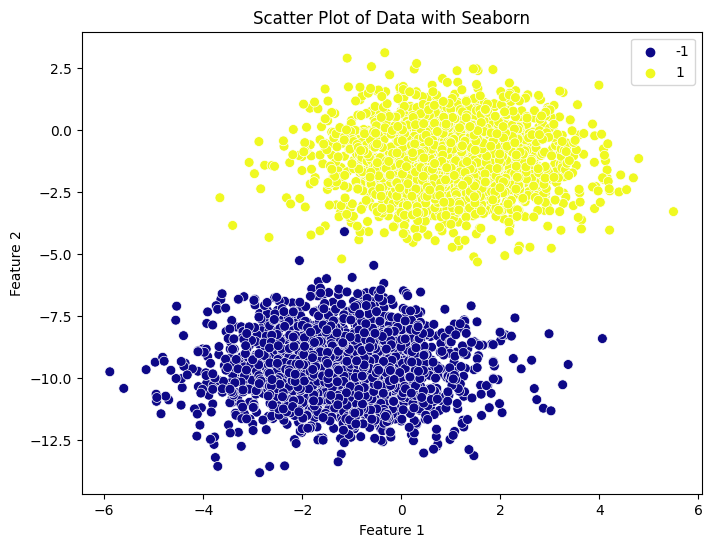

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train.flatten(), palette="plasma", s=50, edgecolor='w', linewidth=0.5)

plt.title("Scatter Plot of Data with Seaborn")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

**INITIALIZE MODEL SOFT_MARGIN_SVM**

In [30]:
class Soft_Margin_SVM:
    def __init__(self, C=1.0):
        self.w = None
        self.b = None
        self.cost = []
        self.C = C

    def fit(self, X, y, learning_rate=0.01, epochs=100, batch_size=64, regularization=0.01):
        y = y.reshape(-1,1)
        np.random.seed(1)
        num_samples, num_features = X.shape
        if self.w is None:
          self.w = np.zeros((num_features, 1))
        if self.b is None:
          self.b = 0

        for epoch in range(epochs):
            X, y = shuffle(X, y)
            loss_sum = 0.0
            num_batches = num_samples // batch_size

            for i in range(num_batches):
                batch_start = i * batch_size
                batch_end = (i + 1) * batch_size
                X_batch = X[batch_start:batch_end]
                y_batch = y[batch_start:batch_end]

                dw, db, loss = self.compute_gradient(X_batch, y_batch, regularization)

                self.w -= learning_rate * dw
                self.b -= learning_rate * db
                loss_sum += loss

            average_loss = loss_sum / num_batches
            self.cost.append(average_loss)
            if (epoch + 1) % 5 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss}")

    def predict(self, X):
        y_pred = np.sign(np.dot(X, self.w) + self.b)
        return y_pred

    def compute_gradient(self, X, y, regularization):
        num_samples = X.shape[0]

        dw = np.zeros_like(self.w, dtype=np.float64)
        db = 0.0
        loss = 0

        for i in range(num_samples):
            if y[i] * (np.dot(X[i], self.w) + self.b) < 1:
                dw += -y[i] * X[i].reshape(-1, 1)
                db += -y[i]
                loss += 1 - y[i] * (np.dot(X[i], self.w) + self.b)

        dw /= num_samples
        db /= num_samples
        loss /= num_samples


        dw += self.C * self.w
        loss += regularization * np.sum(self.w ** 2)

        return dw, db, loss

**C = 0.0001**

**DEPLOY INITIALIZED MODEL**

In [31]:
C = 0.0001

model0 = Soft_Margin_SVM(C=C)
model0.fit(X_train, y_train, epochs=150, batch_size=128, learning_rate=0.01, regularization=0.01)
y_pred = model0.predict(X_test)

Epoch 5/150, Loss: [0.22809159]
Epoch 10/150, Loss: [0.142999]
Epoch 15/150, Loss: [0.09526732]
Epoch 20/150, Loss: [0.06707418]
Epoch 25/150, Loss: [0.05031469]
Epoch 30/150, Loss: [0.04087572]
Epoch 35/150, Loss: [0.03490953]
Epoch 40/150, Loss: [0.03030184]
Epoch 45/150, Loss: [0.02726518]
Epoch 50/150, Loss: [0.02535098]
Epoch 55/150, Loss: [0.02340133]
Epoch 60/150, Loss: [0.02223597]
Epoch 65/150, Loss: [0.02101145]
Epoch 70/150, Loss: [0.02008389]
Epoch 75/150, Loss: [0.01898621]
Epoch 80/150, Loss: [0.01868047]
Epoch 85/150, Loss: [0.01813689]
Epoch 90/150, Loss: [0.01758777]
Epoch 95/150, Loss: [0.01722194]
Epoch 100/150, Loss: [0.01658972]
Epoch 105/150, Loss: [0.01638603]
Epoch 110/150, Loss: [0.01569421]
Epoch 115/150, Loss: [0.01558678]
Epoch 120/150, Loss: [0.015327]
Epoch 125/150, Loss: [0.0151508]
Epoch 130/150, Loss: [0.01487567]
Epoch 135/150, Loss: [0.01456725]
Epoch 140/150, Loss: [0.01439662]
Epoch 145/150, Loss: [0.01417884]
Epoch 150/150, Loss: [0.01345929]


**VISUALIZE COST TREND**

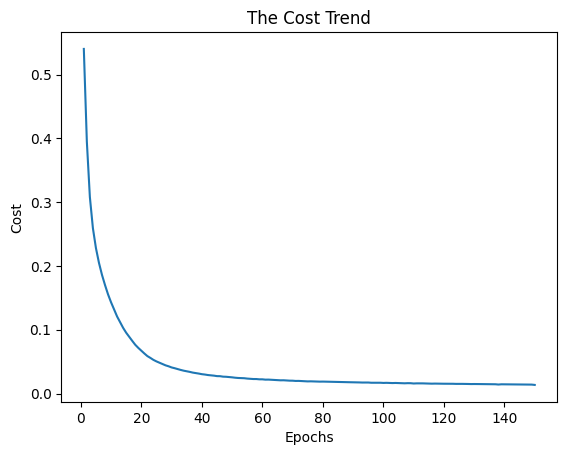

In [32]:
plt.plot(range(1, len(model0.cost) + 1), model0.cost)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('The Cost Trend')
plt.show()

**CLASSIFICATION REPORT**

Accuracy:  1.0000
Lớp 0: Precision =  1.0000, Recall =  1.0000, F1 Score =  1.0000
Lớp 1: Precision =  1.0000, Recall =  1.0000, F1 Score =  1.0000

               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       513
           1       1.00      1.00      1.00       487

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



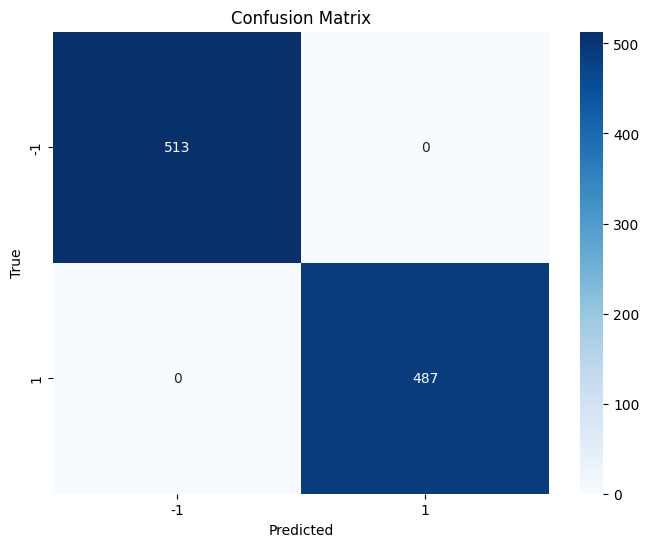

In [33]:
predictions = model0.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions): .4f}")

precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

for i in range(len(precision)):
    print(f"Lớp {i}: Precision = {precision[i]: .4f}, Recall = {recall[i]: .4f}, F1 Score = {f1[i]: .4f}")

report = classification_report(y_test, predictions)
print("\n", report)


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**C = 0.001**

**DEPLOY INITIALIZED MODEL**

In [34]:
C = 0.001

model1 = Soft_Margin_SVM(C=C)
model1.fit(X_train, y_train, epochs=150, batch_size=128, learning_rate=0.01, regularization=0.01)
y_pred = model1.predict(X_test)

Epoch 5/150, Loss: [0.2281101]
Epoch 10/150, Loss: [0.1429382]
Epoch 15/150, Loss: [0.09519513]
Epoch 20/150, Loss: [0.06699848]
Epoch 25/150, Loss: [0.05027221]
Epoch 30/150, Loss: [0.04083634]
Epoch 35/150, Loss: [0.03489294]
Epoch 40/150, Loss: [0.0302919]
Epoch 45/150, Loss: [0.02726652]
Epoch 50/150, Loss: [0.02535936]
Epoch 55/150, Loss: [0.02340936]
Epoch 60/150, Loss: [0.02224073]
Epoch 65/150, Loss: [0.02102237]
Epoch 70/150, Loss: [0.02009374]
Epoch 75/150, Loss: [0.01899924]
Epoch 80/150, Loss: [0.01869136]
Epoch 85/150, Loss: [0.01814762]
Epoch 90/150, Loss: [0.01759588]
Epoch 95/150, Loss: [0.01722711]
Epoch 100/150, Loss: [0.01659622]
Epoch 105/150, Loss: [0.01639531]
Epoch 110/150, Loss: [0.01569806]
Epoch 115/150, Loss: [0.01559191]
Epoch 120/150, Loss: [0.01533567]
Epoch 125/150, Loss: [0.01516137]
Epoch 130/150, Loss: [0.01488205]
Epoch 135/150, Loss: [0.01457269]
Epoch 140/150, Loss: [0.01440281]
Epoch 145/150, Loss: [0.01418248]
Epoch 150/150, Loss: [0.01346696]


**VISUALIZE COST TREND**

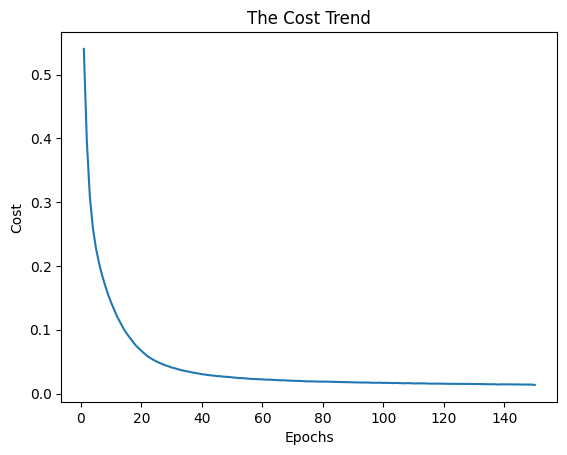

In [35]:
plt.plot(range(1, len(model1.cost) + 1), model1.cost)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('The Cost Trend')
plt.show()

**CLASSIFICATION REPORT**

Accuracy:  1.0000
Lớp 0: Precision =  1.0000, Recall =  1.0000, F1 Score =  1.0000
Lớp 1: Precision =  1.0000, Recall =  1.0000, F1 Score =  1.0000

               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       513
           1       1.00      1.00      1.00       487

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



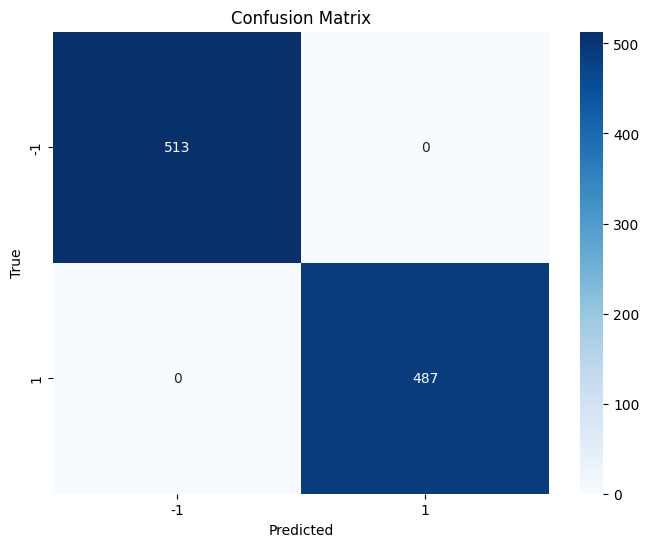

In [36]:
predictions = model1.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions): .4f}")

precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

for i in range(len(precision)):
    print(f"Lớp {i}: Precision = {precision[i]: .4f}, Recall = {recall[i]: .4f}, F1 Score = {f1[i]: .4f}")

report = classification_report(y_test, predictions)
print("\n", report)


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**C = 0.01**

**DEPLOY INITIALIZED MODEL**

In [37]:
C = 0.01

model2 = Soft_Margin_SVM(C=C)
model2.fit(X_train, y_train, epochs=150, batch_size=128, learning_rate=0.01, regularization=0.01)
y_pred = model2.predict(X_test)

Epoch 5/150, Loss: [0.22814307]
Epoch 10/150, Loss: [0.14246067]
Epoch 15/150, Loss: [0.09451521]
Epoch 20/150, Loss: [0.06639972]
Epoch 25/150, Loss: [0.04995074]
Epoch 30/150, Loss: [0.04062596]
Epoch 35/150, Loss: [0.0347693]
Epoch 40/150, Loss: [0.03022287]
Epoch 45/150, Loss: [0.02725634]
Epoch 50/150, Loss: [0.02534771]
Epoch 55/150, Loss: [0.02343626]
Epoch 60/150, Loss: [0.02228351]
Epoch 65/150, Loss: [0.02106799]
Epoch 70/150, Loss: [0.02015293]
Epoch 75/150, Loss: [0.01908412]
Epoch 80/150, Loss: [0.01878138]
Epoch 85/150, Loss: [0.01823801]
Epoch 90/150, Loss: [0.01769177]
Epoch 95/150, Loss: [0.01733283]
Epoch 100/150, Loss: [0.01669973]
Epoch 105/150, Loss: [0.01648543]
Epoch 110/150, Loss: [0.01581033]
Epoch 115/150, Loss: [0.01571581]
Epoch 120/150, Loss: [0.01546044]
Epoch 125/150, Loss: [0.01529433]
Epoch 130/150, Loss: [0.01500522]
Epoch 135/150, Loss: [0.01470283]
Epoch 140/150, Loss: [0.01452381]
Epoch 145/150, Loss: [0.01432253]
Epoch 150/150, Loss: [0.01357974]


**VISUALIZE COST TREND**

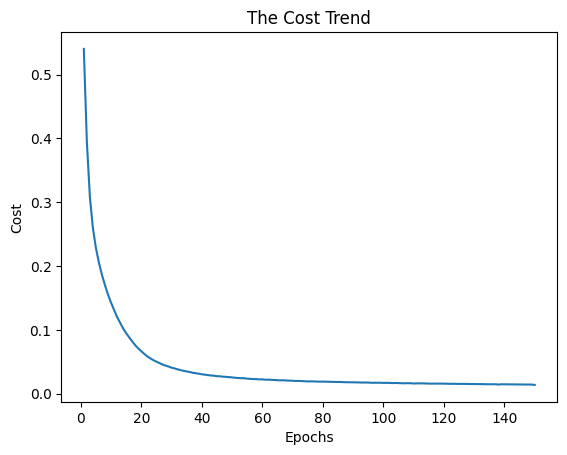

In [38]:
plt.plot(range(1, len(model2.cost) + 1), model2.cost)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('The Cost Trend')
plt.show()

**CLASSIFICATION REPORT**

Accuracy:  1.0000
Lớp 0: Precision =  1.0000, Recall =  1.0000, F1 Score =  1.0000
Lớp 1: Precision =  1.0000, Recall =  1.0000, F1 Score =  1.0000

               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       513
           1       1.00      1.00      1.00       487

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



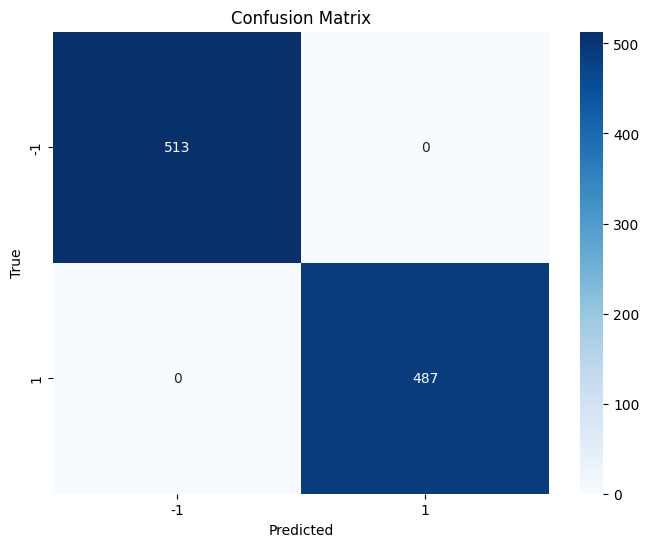

In [39]:
predictions = model2.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions): .4f}")

precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

for i in range(len(precision)):
    print(f"Lớp {i}: Precision = {precision[i]: .4f}, Recall = {recall[i]: .4f}, F1 Score = {f1[i]: .4f}")

report = classification_report(y_test, predictions)
print("\n", report)


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**C = 0.1**

**DEPLOY INITIALIZED MODEL**

In [40]:
C = 0.1

model3 = Soft_Margin_SVM(C=C)
model3.fit(X_train, y_train, epochs=150, batch_size=128, learning_rate=0.01, regularization=0.01)
y_pred = model3.predict(X_test)

Epoch 5/150, Loss: [0.22892979]
Epoch 10/150, Loss: [0.13870719]
Epoch 15/150, Loss: [0.0894838]
Epoch 20/150, Loss: [0.0629943]
Epoch 25/150, Loss: [0.04845305]
Epoch 30/150, Loss: [0.03994629]
Epoch 35/150, Loss: [0.03467608]
Epoch 40/150, Loss: [0.03050037]
Epoch 45/150, Loss: [0.02767204]
Epoch 50/150, Loss: [0.02581724]
Epoch 55/150, Loss: [0.02412554]
Epoch 60/150, Loss: [0.02306515]
Epoch 65/150, Loss: [0.02192402]
Epoch 70/150, Loss: [0.02105825]
Epoch 75/150, Loss: [0.02011861]
Epoch 80/150, Loss: [0.01996552]
Epoch 85/150, Loss: [0.01940093]
Epoch 90/150, Loss: [0.01890921]
Epoch 95/150, Loss: [0.0185058]
Epoch 100/150, Loss: [0.01786772]
Epoch 105/150, Loss: [0.01779563]
Epoch 110/150, Loss: [0.01710925]
Epoch 115/150, Loss: [0.01704297]
Epoch 120/150, Loss: [0.01691223]
Epoch 125/150, Loss: [0.01671575]
Epoch 130/150, Loss: [0.01645687]
Epoch 135/150, Loss: [0.01621002]
Epoch 140/150, Loss: [0.01598561]
Epoch 145/150, Loss: [0.01588048]
Epoch 150/150, Loss: [0.0150253]


**VISUALIZE COST TREND**

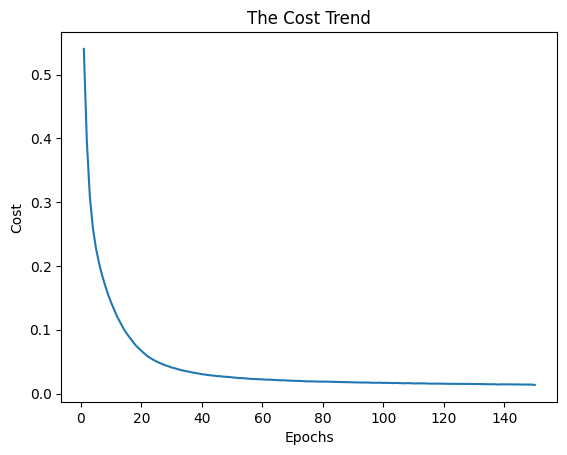

In [41]:
plt.plot(range(1, len(model1.cost) + 1), model1.cost)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('The Cost Trend')
plt.show()

**CLASSIFICATION REPORT**

Accuracy:  1.0000
Lớp 0: Precision =  1.0000, Recall =  1.0000, F1 Score =  1.0000
Lớp 1: Precision =  1.0000, Recall =  1.0000, F1 Score =  1.0000

               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       513
           1       1.00      1.00      1.00       487

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



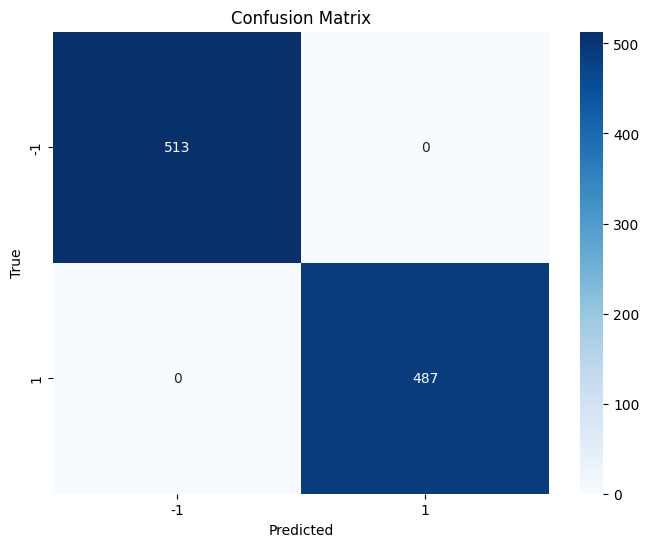

In [42]:
predictions = model3.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions): .4f}")

precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

for i in range(len(precision)):
    print(f"Lớp {i}: Precision = {precision[i]: .4f}, Recall = {recall[i]: .4f}, F1 Score = {f1[i]: .4f}")

report = classification_report(y_test, predictions)
print("\n", report)


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**C = 1.0**

**DEPLOY INITIALIZED MODEL**

In [43]:
C = 1.0

model4 = Soft_Margin_SVM(C=C)
model4.fit(X_train, y_train, epochs=150, batch_size=128, learning_rate=0.01, regularization=0.01)
y_pred = model4.predict(X_test)

Epoch 5/150, Loss: [0.2449767]
Epoch 10/150, Loss: [0.13218725]
Epoch 15/150, Loss: [0.08369069]
Epoch 20/150, Loss: [0.06378671]
Epoch 25/150, Loss: [0.05454441]
Epoch 30/150, Loss: [0.04848882]
Epoch 35/150, Loss: [0.0450275]
Epoch 40/150, Loss: [0.04189056]
Epoch 45/150, Loss: [0.04055102]
Epoch 50/150, Loss: [0.03946154]
Epoch 55/150, Loss: [0.0385676]
Epoch 60/150, Loss: [0.0381087]
Epoch 65/150, Loss: [0.03724009]
Epoch 70/150, Loss: [0.03659741]
Epoch 75/150, Loss: [0.03618489]
Epoch 80/150, Loss: [0.03593162]
Epoch 85/150, Loss: [0.03644363]
Epoch 90/150, Loss: [0.03565928]
Epoch 95/150, Loss: [0.03554666]
Epoch 100/150, Loss: [0.03468302]
Epoch 105/150, Loss: [0.03562131]
Epoch 110/150, Loss: [0.03491369]
Epoch 115/150, Loss: [0.03501405]
Epoch 120/150, Loss: [0.03515308]
Epoch 125/150, Loss: [0.03487374]
Epoch 130/150, Loss: [0.03490875]
Epoch 135/150, Loss: [0.03465611]
Epoch 140/150, Loss: [0.03494831]
Epoch 145/150, Loss: [0.03507964]
Epoch 150/150, Loss: [0.03394107]


**VISUALIZE COST TREND**

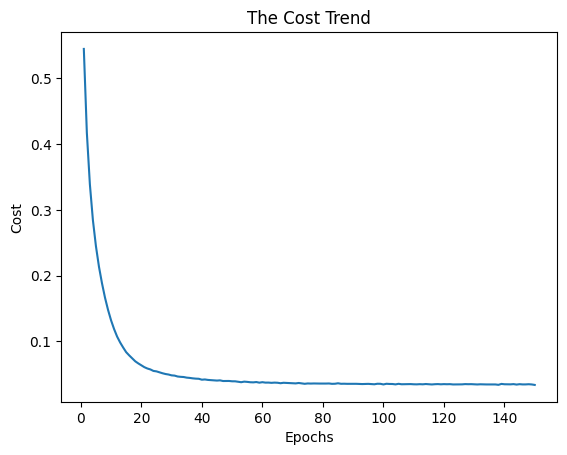

In [44]:
plt.plot(range(1, len(model4.cost) + 1), model4.cost)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('The Cost Trend')
plt.show()

**CLASSIFICATION REPORT**

Accuracy:  0.9990
Lớp 0: Precision =  1.0000, Recall =  0.9981, F1 Score =  0.9990
Lớp 1: Precision =  0.9980, Recall =  1.0000, F1 Score =  0.9990

               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       513
           1       1.00      1.00      1.00       487

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



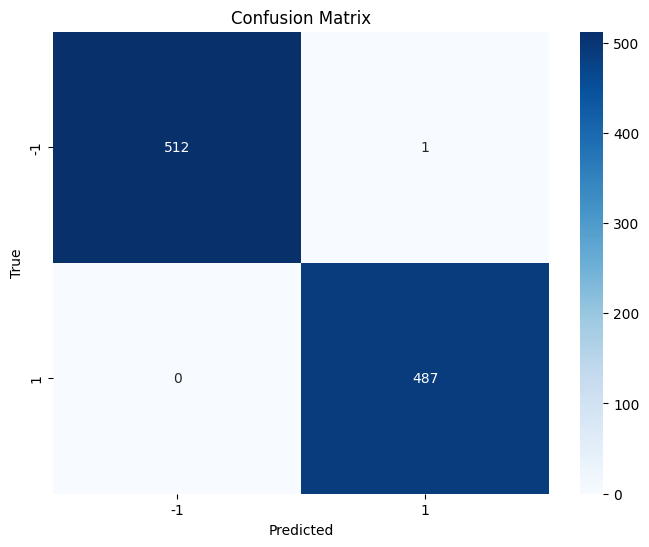

In [45]:
predictions = model4.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions): .4f}")

precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

for i in range(len(precision)):
    print(f"Lớp {i}: Precision = {precision[i]: .4f}, Recall = {recall[i]: .4f}, F1 Score = {f1[i]: .4f}")

report = classification_report(y_test, predictions)
print("\n", report)


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**C = 10.0**

**DEPLOY INITIALIZED MODEL**

In [46]:
C = 10.0

model5 = Soft_Margin_SVM(C=C)
model5.fit(X_train, y_train, epochs=150, batch_size=128, learning_rate=0.01, regularization=0.01)
y_pred = model5.predict(X_test)

Epoch 5/150, Loss: [0.39979933]
Epoch 10/150, Loss: [0.25519753]
Epoch 15/150, Loss: [0.18509084]
Epoch 20/150, Loss: [0.16450751]
Epoch 25/150, Loss: [0.1592385]
Epoch 30/150, Loss: [0.15665592]
Epoch 35/150, Loss: [0.15608364]
Epoch 40/150, Loss: [0.15541312]
Epoch 45/150, Loss: [0.15645139]
Epoch 50/150, Loss: [0.15569633]
Epoch 55/150, Loss: [0.15580703]
Epoch 60/150, Loss: [0.15584505]
Epoch 65/150, Loss: [0.15536928]
Epoch 70/150, Loss: [0.1562139]
Epoch 75/150, Loss: [0.15558074]
Epoch 80/150, Loss: [0.15663283]
Epoch 85/150, Loss: [0.15730717]
Epoch 90/150, Loss: [0.15574615]
Epoch 95/150, Loss: [0.15554089]
Epoch 100/150, Loss: [0.15578898]
Epoch 105/150, Loss: [0.1568381]
Epoch 110/150, Loss: [0.15328062]
Epoch 115/150, Loss: [0.15572914]
Epoch 120/150, Loss: [0.15511046]
Epoch 125/150, Loss: [0.15601609]
Epoch 130/150, Loss: [0.15612856]
Epoch 135/150, Loss: [0.15510738]
Epoch 140/150, Loss: [0.15459065]
Epoch 145/150, Loss: [0.15413067]
Epoch 150/150, Loss: [0.15388458]


**VISUALIZE COST TREND**

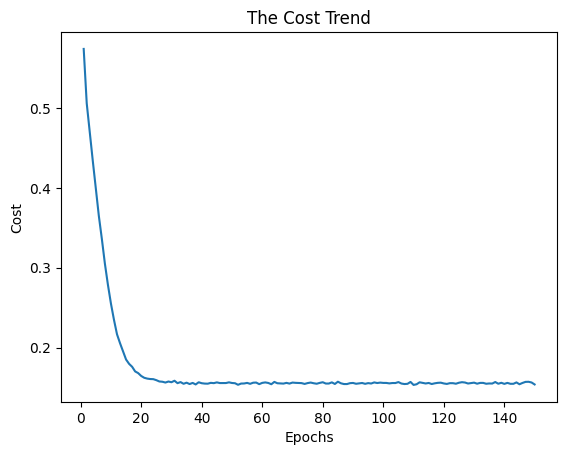

In [47]:
plt.plot(range(1, len(model5.cost) + 1), model5.cost)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('The Cost Trend')
plt.show()

**CLASSIFICATION REPORT**

Accuracy:  0.9990
Lớp 0: Precision =  1.0000, Recall =  0.9981, F1 Score =  0.9990
Lớp 1: Precision =  0.9980, Recall =  1.0000, F1 Score =  0.9990

               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       513
           1       1.00      1.00      1.00       487

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



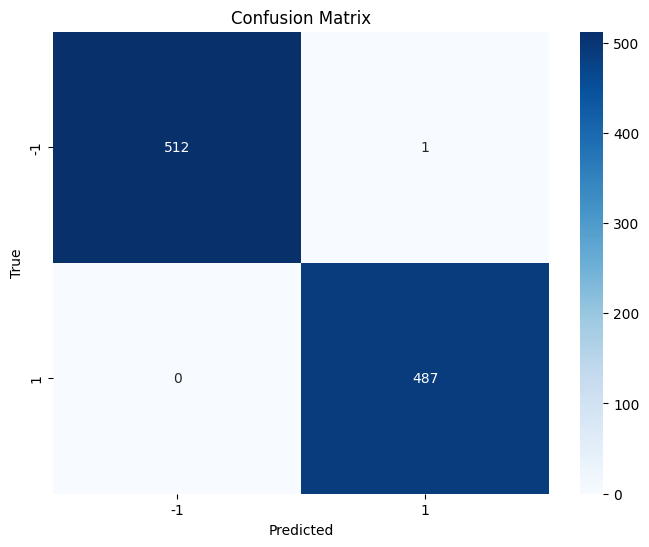

In [48]:
predictions = model5.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions): .4f}")

precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

for i in range(len(precision)):
    print(f"Lớp {i}: Precision = {precision[i]: .4f}, Recall = {recall[i]: .4f}, F1 Score = {f1[i]: .4f}")

report = classification_report(y_test, predictions)
print("\n", report)


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**VISUALIZE DATA AND DECISION BOUNDARY (COMPARE BETWEEN SELF-DEFINE FUNCTION AND MODEL SVC)**

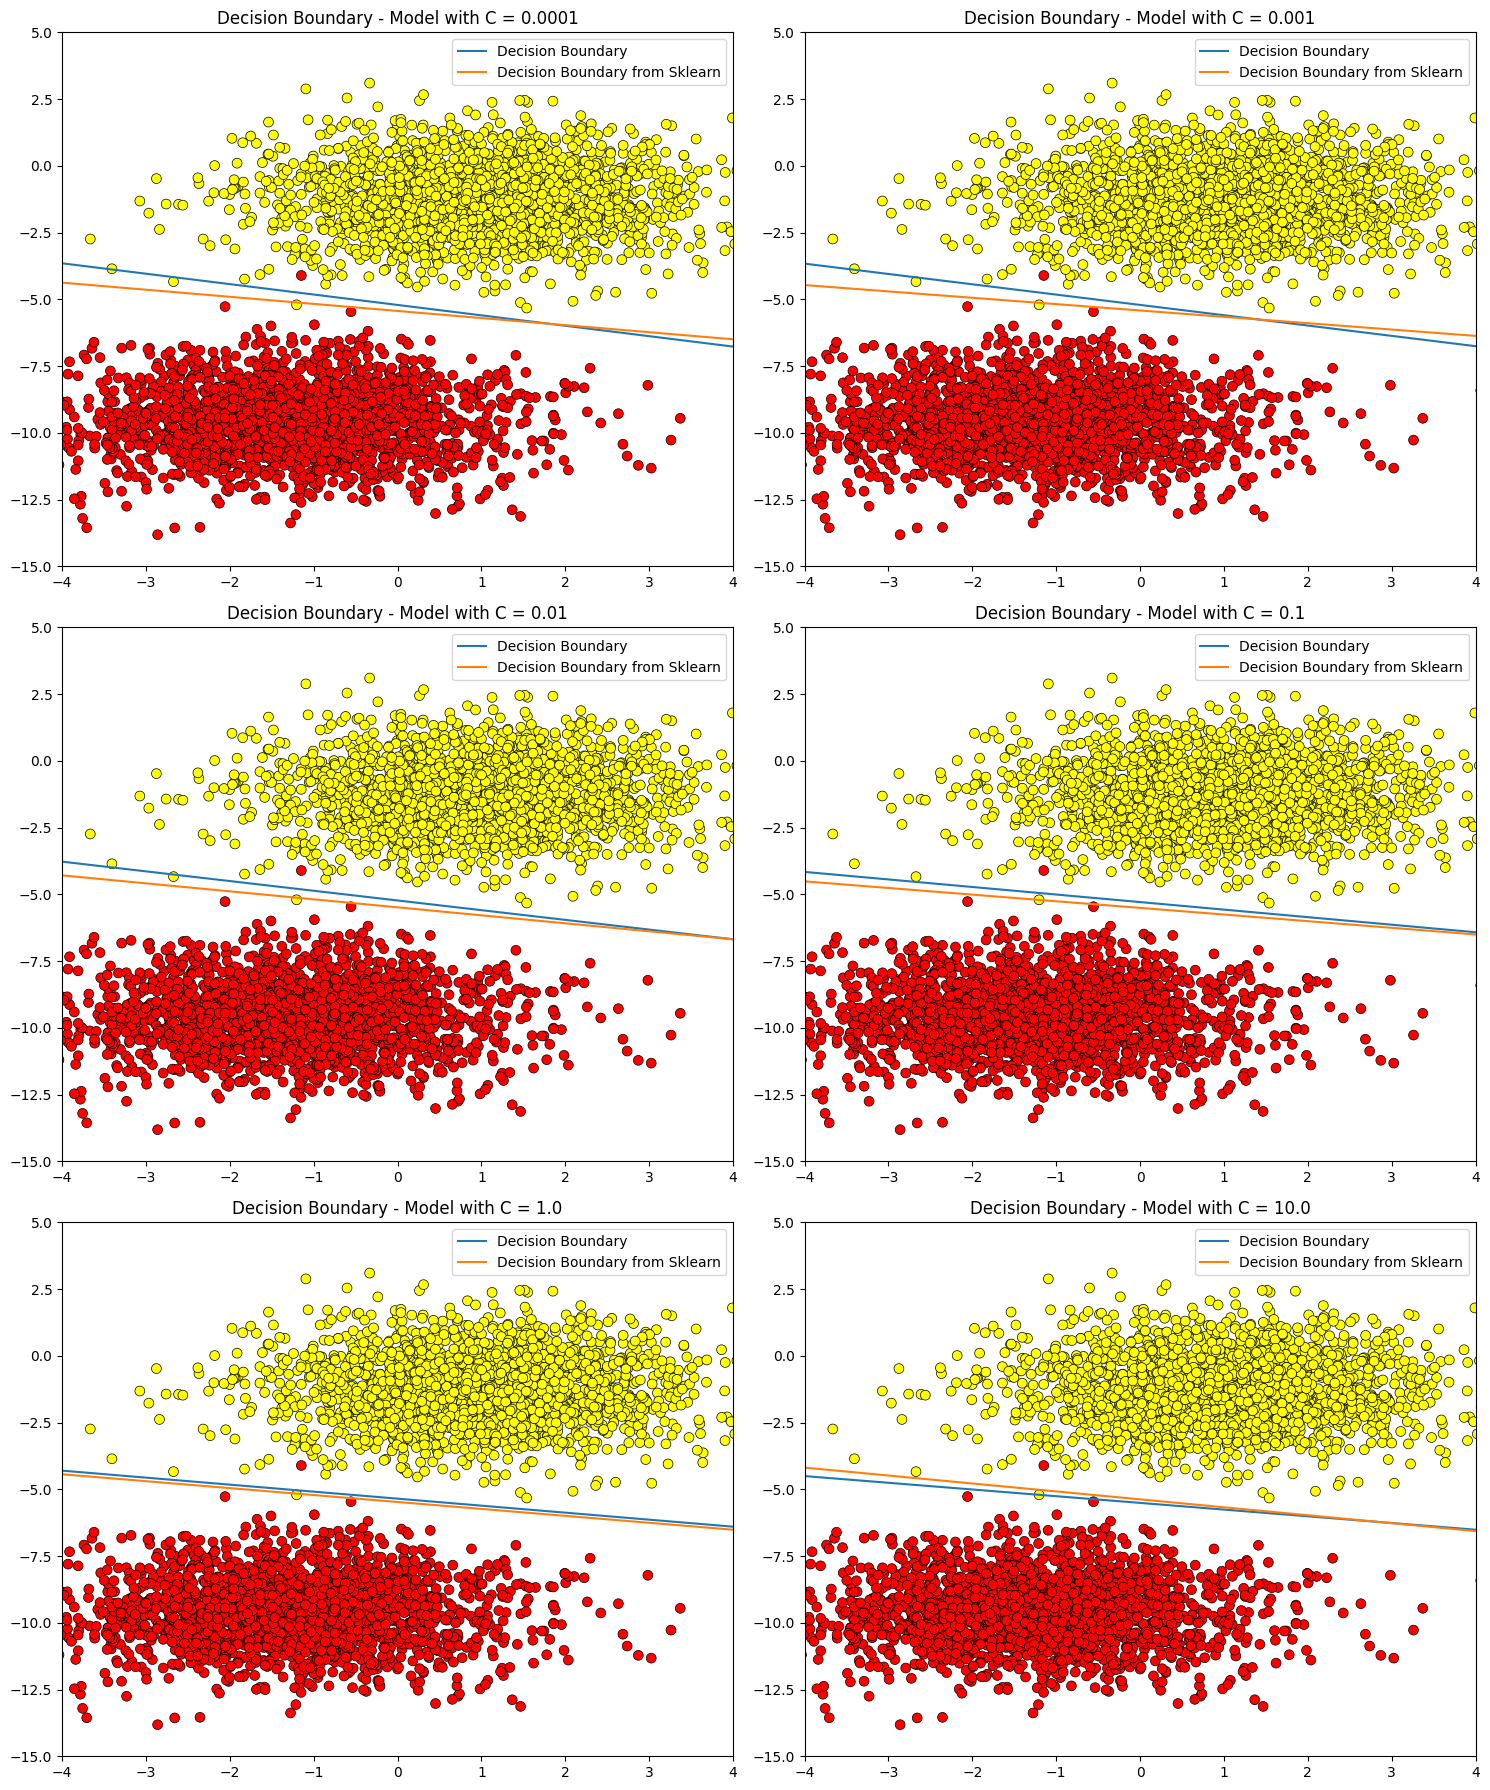

In [50]:
from sklearn.svm import SVC

models = [model0, model1, model2, model3, model4, model5]
C_arrays = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]

plt.figure(figsize=(15, 18))

for i, (model, C_value) in enumerate(zip(models, C_arrays)):
    plt.subplot(3, 2, i+1)
    weights = model.w.flatten()
    bias = model.b
    x_ = np.linspace(-4, 4, 1000)
    y_ = (-weights[0] * x_ - bias) / weights[1]

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.flatten(), s=50, cmap='autumn', linewidth=0.5, edgecolors='k')
    plt.plot(x_, y_, label='Decision Boundary')

    svc = SVC(kernel='linear', C=C_value)
    svc.fit(X_train, y_train)
    w = svc.coef_[0]
    b = svc.intercept_[0]

    x_svc = np.linspace(-4, 4, 1000)
    y_svc = (-w[0] * x_svc - b) / w[1]
    plt.plot(x_svc, y_svc, label='Decision Boundary from Sklearn')

    plt.legend()
    plt.title(f'Decision Boundary - Model with C = {C_value}')
    plt.xlim(-4, 4)
    plt.ylim(-15, 5)

plt.tight_layout()
plt.show()

***EXAMPLE OF USING MODEL FOR CIFAR10***

In [25]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

170498071/170498071 [==============================] - 2s 0us/step


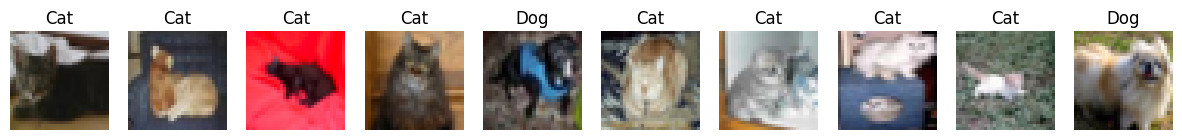

In [26]:
# Chỉ lấy các mẫu dữ liệu có nhãn là "Chó" hoặc "Mèo"
dog_cat_indices = [class_names.index('Dog'), class_names.index('Cat')]
mask = np.any(y_train == dog_cat_indices, axis=1)
X_train_dog_cat = X_train[mask]
y_train_dog_cat = y_train[mask]

plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train_dog_cat[i])
    plt.title(class_names[int(y_train_dog_cat[i])])
    plt.axis('off')

plt.show()

**SPLIT AND PREPROCESS DATA**

In [27]:
def cat_or_dog(label):
  return label==3 or label==5

train_index=[]
test_index=[]
for i in range(len(y_train)):
  if cat_or_dog(y_train[i])==True:
    train_index.append(i)
for i in range(len(y_test)):
  if cat_or_dog(y_test[i])==True:
    test_index.append(i)

X_train = X_train[train_index]
y_train = y_train[train_index]
X_test = X_test[test_index]
y_test = y_test[test_index]

y_train = np.where(y_train == 3, -1, 1)
y_test = np.where(y_test == 3, -1, 1)

X_train, y_train=shuffle(X_train, y_train)

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape

(10000, 3072)

**SCATTER PLOT DATA AFTER SPLIT AND PREPROCESS**

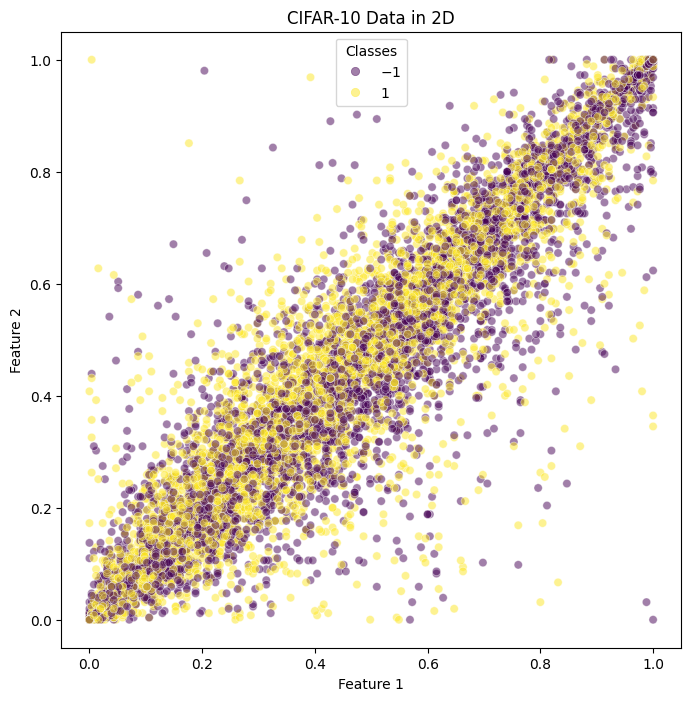

In [28]:
plt.figure(figsize=(8, 8))
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:, 0], cmap='viridis', alpha=0.5, edgecolor='w', linewidth=0.5)
plt.title('CIFAR-10 Data in 2D')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()

**APPLY MODEL**

In [29]:
C = 0.01

model = Soft_Margin_SVM(C=C)

In [30]:
model.fit(X_train, y_train, epochs = 100, learning_rate = 0.001, batch_size =  128, regularization = 0.001)

Epoch 5/100, Loss: [0.90452464]
Epoch 10/100, Loss: [0.89089792]
Epoch 15/100, Loss: [0.88192318]
Epoch 20/100, Loss: [0.87588614]
Epoch 25/100, Loss: [0.87087328]
Epoch 30/100, Loss: [0.86687012]
Epoch 35/100, Loss: [0.86477779]
Epoch 40/100, Loss: [0.8636768]
Epoch 45/100, Loss: [0.86026515]
Epoch 50/100, Loss: [0.85949492]
Epoch 55/100, Loss: [0.85799456]
Epoch 60/100, Loss: [0.85544544]
Epoch 65/100, Loss: [0.85387522]
Epoch 70/100, Loss: [0.85317831]
Epoch 75/100, Loss: [0.85183266]
Epoch 80/100, Loss: [0.84936282]
Epoch 85/100, Loss: [0.84948862]
Epoch 90/100, Loss: [0.84733444]
Epoch 95/100, Loss: [0.84725898]
Epoch 100/100, Loss: [0.84666491]


**VISUALIZE COST TREND**

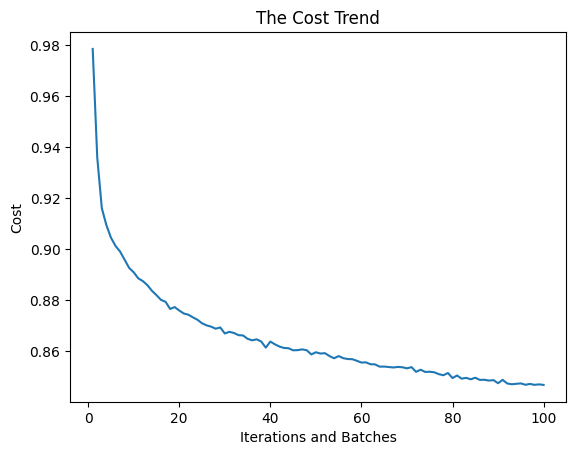

In [31]:
plt.plot(range(1, len(model.cost) + 1), model.cost)
plt.xlabel('Iterations and Batches')
plt.ylabel('Cost')
plt.title('The Cost Trend')
plt.show()

**CLASSIFICATION REPORT**

Accuracy:  0.6040
Lớp 0: Precision =  0.6417, Recall =  0.4710, F1 Score =  0.5433
Lớp 1: Precision =  0.5821, Recall =  0.7370, F1 Score =  0.6505

               precision    recall  f1-score   support

          -1       0.64      0.47      0.54      1000
           1       0.58      0.74      0.65      1000

    accuracy                           0.60      2000
   macro avg       0.61      0.60      0.60      2000
weighted avg       0.61      0.60      0.60      2000



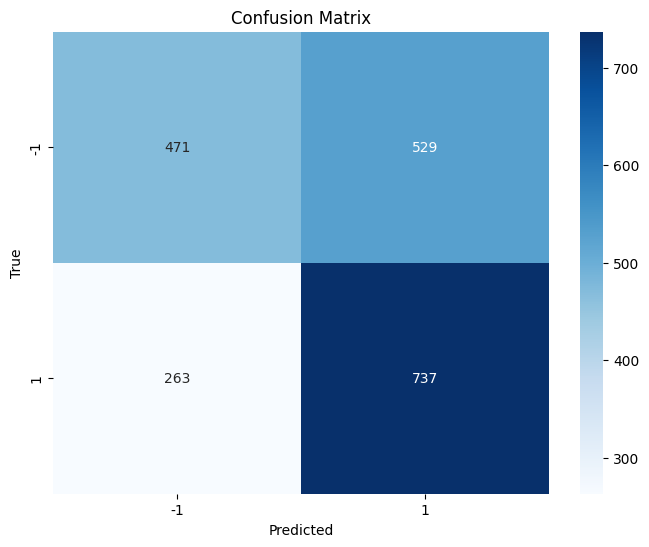

In [32]:
predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions): .4f}")

precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

for i in range(len(precision)):
    print(f"Lớp {i}: Precision = {precision[i]: .4f}, Recall = {recall[i]: .4f}, F1 Score = {f1[i]: .4f}")

report = classification_report(y_test, predictions)
print("\n", report)


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**COMPARE BETWEEN SELF-DEFINE FUNCTION AND MODEL FROM SVC**

In [33]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C = 0.01, random_state = 42)
svc.fit(X_train, y_train.flatten())

SVC(C=0.01, kernel='linear', random_state=42)

Accuracy:  0.6230
Lớp 0: Precision =  0.6208, Recall =  0.6320, F1 Score =  0.6264
Lớp 1: Precision =  0.6253, Recall =  0.6140, F1 Score =  0.6196

               precision    recall  f1-score   support

          -1       0.62      0.63      0.63      1000
           1       0.63      0.61      0.62      1000

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.62      0.62      0.62      2000



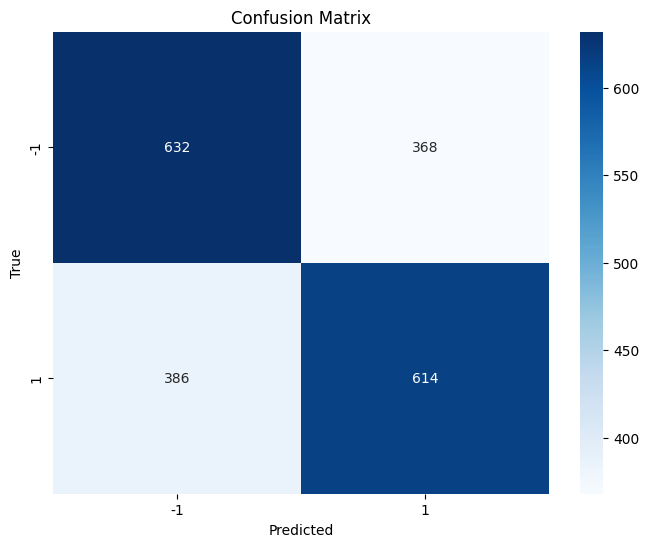

In [34]:
predictions = svc.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions): .4f}")

precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

for i in range(len(precision)):
    print(f"Lớp {i}: Precision = {precision[i]: .4f}, Recall = {recall[i]: .4f}, F1 Score = {f1[i]: .4f}")

report = classification_report(y_test, predictions)
print("\n", report)


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()